In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv("Downloads\\Classification_train\\Classification_train.csv")
# print(data)
# print(data.columns)
data = data.to_numpy()    #converting the dataset to numpy

<H3>STEPS</H3>
1)Understanding the training dataset
<br>
2)Feature scaling
<br>
3)Defining necessary functions
<br>
4)Finding parameters using Gradient Descent Algorithm
<br>
5)accuracy
<br>
6)Working on Test-dataset

In [4]:
np.random.shuffle(data)
X = data[:, range(1,785)]   #features
Y = data[: , 0]            #targets

In [5]:
X_train = X[:20000 , :]
Y_train = Y[:20000]
X_val = X[20000: , :]
Y_val = Y[20000:]

In [6]:
print(X_train[:2, :])
print(X_train.shape)
print(X_val.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(20000, 784)
(10000, 784)


In [7]:
print(Y_train)
Y_train.shape

[7 3 6 ... 3 2 4]


(20000,)

In [8]:
print(X_train[0].max())
print(X_train[0].min()) 

255
0


<h3>Feature Scaling</h3>

In [37]:
def norm(X):
    denominator_range = np.ptp(X, axis=1,keepdims = True)
    output = X/denominator_range
    return output


In [38]:
X_train_final = norm(X_train)    #final X that is to be used for further computations
print(X_train_final)
X_val_final = norm(X_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
print(X_train_final.max())
print(X_train_final.min())

1.0
0.0


In [40]:
print(X_val_final[0].max())
print(X_val_final[0].min())

1.0
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

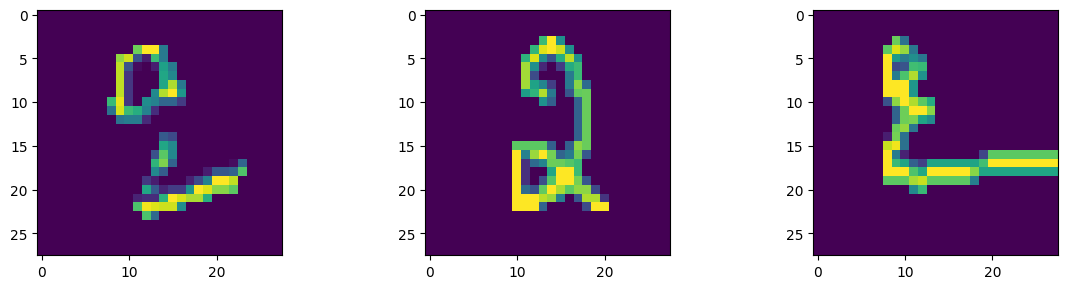

In [41]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_train[i].reshape(28,28))
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

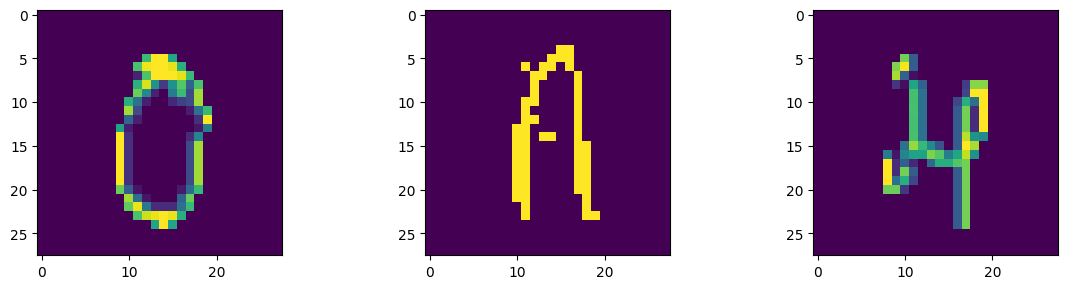

In [42]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_val[i].reshape(28,28))
plt.tight_layout()
plt.show

In [15]:
t = np.unique(Y_train)
print(t)

[0 1 2 3 4 5 6 7 8 9]


<h3>Defining some necessary function</h3>

In [16]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [17]:
'''One-hot Encoding'''
def one_hot(classes,Y):
    Y_one_hot = np.eye(classes)[Y]
    return Y_one_hot.T

In [18]:
u = one_hot(10,Y_train)
print(u)
print(u.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 20000)


In [19]:
def compute_logistic_cost(X, Y, w, b, t):
    m, n = X.shape
    f_wb = sigmoid(X @ w.T + b)
    cost = np.mean(-Y.T * np.log(f_wb) - (1 - Y.T) * np.log(1 - f_wb))
    return cost

In [20]:
def compute_logistic_gradient(X, Y, w, b, t):
    m, n = X.shape
    dj_db = np.mean(sigmoid(X@w.T +b) - Y.T , axis = 0)
    dj_dw = (sigmoid(X@w.T+b)-Y.T).T@X
    dj_dw = dj_dw/m   
    return dj_dw, dj_db
    #X = (m,n)   #w=(classes , n)   b=(1,classes)    classes= t.shape[0]
       #f_wb = (m,classes)     #y = (classes,m)

In [21]:
'''function to perform Gradient Descent algorithm'''
def Gradient_descent_logistic(X, Y ,num_iters,alpha,t):
    m,n = X.shape
    classes = t.shape[0]
    w= np.zeros((t.shape[0],n))   
    b=  np.zeros(t.shape[0])
    cost_history = []
    for i in range(num_iters):
        dj_dw,dj_db = compute_logistic_gradient(X,Y,w,b,t)
        w = w - (alpha*dj_dw)
        b = b - (alpha*dj_db)
        cost_history.append(compute_logistic_cost(X,Y,w,b,t))
        if ( i% math.ceil(num_iters/100) == 0):
            print(f"Iterations : {i:5} , cost : {cost_history[-1]}")
    return w, b, cost_history

<h3>Finding parameters using Gradient Descent Algorithm</h3>
<h5>Initialized weights and biases with zeroes of respective size</h5>

In [22]:
alpha = 1
w_final , b_final  , J_history = Gradient_descent_logistic(X_train_final ,u , 10000, alpha ,t)

Iterations :     0 , cost : 0.5140925466409143
Iterations :   100 , cost : 0.05234852726782416
Iterations :   200 , cost : 0.04350906855611494
Iterations :   300 , cost : 0.03944787622720561
Iterations :   400 , cost : 0.03695145260132202
Iterations :   500 , cost : 0.03520006481100933
Iterations :   600 , cost : 0.03387392880693173
Iterations :   700 , cost : 0.03281862615748937
Iterations :   800 , cost : 0.0319490610461815
Iterations :   900 , cost : 0.031213860202623445
Iterations :  1000 , cost : 0.03057985395179161
Iterations :  1100 , cost : 0.030024493392093714
Iterations :  1200 , cost : 0.02953181246752975
Iterations :  1300 , cost : 0.029090127281001032
Iterations :  1400 , cost : 0.028690651651156883
Iterations :  1500 , cost : 0.02832662569550147
Iterations :  1600 , cost : 0.027992746293247304
Iterations :  1700 , cost : 0.027684782771711307
Iterations :  1800 , cost : 0.02739931036738987
Iterations :  1900 , cost : 0.027133520912496805
Iterations :  2000 , cost : 0.02688

<h3>COST VS NUMBER  OF ITERATIONS PLOT</h3>

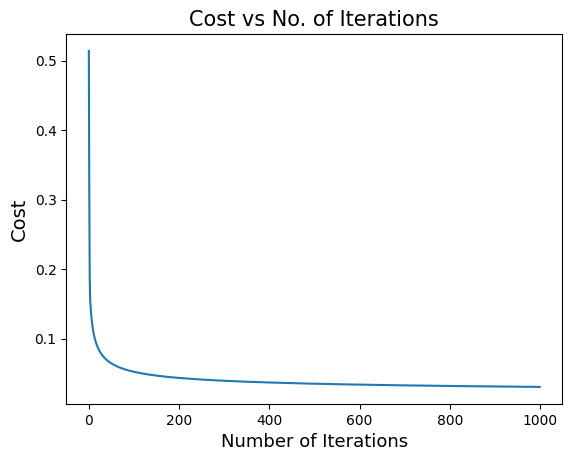

In [23]:
plt.plot(np.arange(len(J_history))[:1000], J_history[:1000])
plt.xlabel('Number of Iterations', size=13)
plt.ylabel('Cost', size=14)
plt.title('Cost vs No. of Iterations', size = 15)
plt.show()

In [24]:
print(w_final.shape)
print(w_final.max())
print(w_final.min())

(10, 784)
1.944579104014074
-3.090969124340138


In [25]:
print(b_final)

[-5.89030205  0.92725155 -3.0102408  -4.85225835 -4.03326765 -7.85101186
  1.54548514 -2.99767781 -2.62461905 -2.3044427 ]


In [26]:
def Predictions(X,w,b):
    return sigmoid(X@w.T+b)

In [27]:
Y_train_predict = Predictions(X_train_final , w_final , b_final)
print (Y_train_predict)
Y_train_predict.shape

[[1.36874649e-04 1.60815348e-08 1.14165436e-08 ... 9.64014508e-01
  2.49554886e-08 9.73806061e-05]
 [4.41688250e-07 1.99023077e-08 9.95293786e-05 ... 4.83965193e-06
  8.59262524e-11 9.59157711e-09]
 [7.40355222e-08 1.34208065e-06 1.21181621e-10 ... 3.36913699e-04
  1.18642088e-08 1.39493056e-08]
 ...
 [9.21158120e-08 3.06139794e-05 3.41671064e-03 ... 5.53384841e-03
  1.21971282e-09 1.31391604e-03]
 [2.77619650e-08 6.36286210e-07 9.99999920e-01 ... 9.14783590e-13
  2.68032960e-10 1.45260747e-07]
 [3.91419930e-08 4.92277401e-11 6.38426983e-04 ... 1.38182275e-03
  1.46834055e-05 1.60952415e-03]]


(20000, 10)

In [28]:
predicted_class = np.argmax(Y_train_predict,axis=1)
print(predicted_class)

[7 3 6 ... 3 2 4]


In [29]:
accuracy = np.mean(predicted_class ==Y_train)*100
print(accuracy)

97.795


In [30]:
Y_val_predict = Predictions(X_val_final , w_final , b_final)
print (Y_val_predict)
Y_val_predict.shape

[[9.97553101e-01 1.39578469e-04 3.94842195e-05 ... 1.32888902e-04
  4.68035183e-05 2.01644159e-07]
 [4.59082063e-04 9.96840117e-01 3.16372900e-06 ... 3.89409639e-06
  1.55410788e-09 1.14019938e-06]
 [5.19078579e-07 6.41949364e-05 3.59481409e-04 ... 1.48052469e-13
  8.14925660e-04 5.57557749e-09]
 ...
 [9.25138876e-06 1.38843039e-05 1.18474288e-05 ... 8.87593542e-03
  1.06489096e-07 2.82646883e-04]
 [4.56101758e-05 1.61741107e-10 4.62773842e-10 ... 2.35199740e-13
  9.99999266e-01 5.49021027e-05]
 [4.74737867e-03 1.51130861e-07 7.02868256e-08 ... 6.54453181e-10
  9.99885289e-01 1.17450480e-06]]


(10000, 10)

In [31]:
predicted_val_class = np.argmax(Y_val_predict,axis=1)
print(predicted_val_class)

[0 1 5 ... 3 8 8]


In [32]:
accuracy = np.mean(predicted_val_class ==Y_val)*100
print(accuracy)

96.73


<h3>Testing the model on the Test dataset</h3>

In [43]:
test_data = pd.read_csv("Downloads\\Classification_test\\Classification_test.csv")
# print(test_data.columns)
test_data = test_data.to_numpy()

In [44]:
X_test = np.delete(test_data , 0 , axis =1)
ID = test_data[:,0]

In [45]:
X_test.shape

(10000, 784)

In [46]:
X_test_final = norm(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

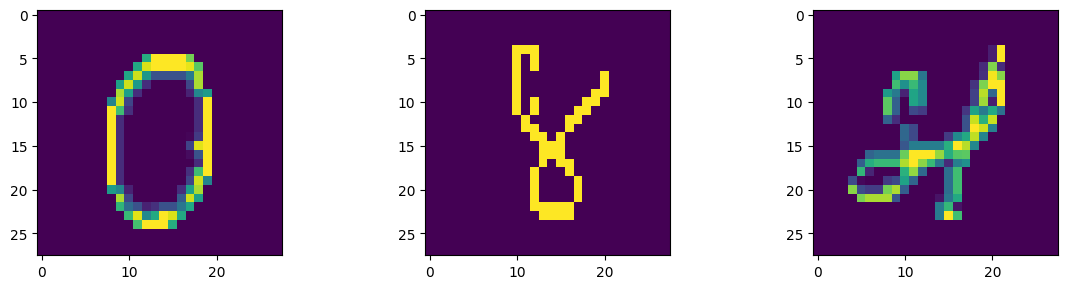

In [47]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_test[i].reshape(28,28))
plt.tight_layout()
plt.show

In [48]:
Y_test_predict = Predictions(X_test_final , w_final , b_final)
print (Y_test_predict)
Y_test_predict.shape

[[9.98699236e-01 2.22966561e-05 4.56751827e-04 ... 4.90598786e-05
  5.59722289e-05 9.60376737e-09]
 [1.83687740e-06 1.43599947e-12 9.33273293e-06 ... 8.60538450e-07
  7.52313625e-05 3.04216832e-05]
 [1.49332188e-10 4.69774070e-09 2.36122426e-02 ... 5.35920537e-21
  1.12576984e-02 5.71961759e-06]
 ...
 [9.99557748e-01 5.30622029e-09 1.00886798e-06 ... 7.06513778e-03
  7.22168002e-04 1.58791862e-07]
 [2.31666350e-02 6.46864191e-09 3.09248502e-05 ... 5.26328712e-07
  9.98546313e-01 1.47831117e-08]
 [4.11633504e-10 3.87045304e-01 9.93825822e-01 ... 8.30947742e-09
  2.60597594e-07 4.87687359e-08]]


(10000, 10)

In [49]:
predicted_test_class = np.argmax(Y_test_predict,axis=1)
print(predicted_test_class)

[0 4 5 ... 0 8 2]


In [50]:
test_data_predictions = np.c_[ID,predicted_test_class]
df = pd.DataFrame(test_data_predictions , columns = ['IDs','Predicted-Labels'])
df.to_csv("Downloads\\CL-Project\\logistic_Reg_Predictions.csv", index=False)